In [28]:
"""
Created on Sun Mar 31 20:09:24 2019

@author: Alan Hurtarte
"""
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = np.load('proyecto_training_data.npy')
train_data_length = (int)(data.shape[0] * 0.8)
train_data = data[0:train_data_length,:]
test_data = data[train_data_length:,:]

sale_price_td = train_data[:,0]
overall_quality_td = train_data[:,1]
first_floor_square_feet_td = train_data[:,2]
total_rooms_td = train_data[:,3]
year_built_td = train_data[:,4]
loat_front_td = np.nan_to_num(train_data[:,5])

data_labels = ["Sales Price", "Overall material and finish quality", 'First Floor square feet', 'Total rooms above grade', 'Original construction date', 'Linear feet of street connected to property']


def get_mean_max_min_range_dv(nd_array):
    mean = np.mean(nd_array)
    c_max = np.max(nd_array)
    c_min = np.min(nd_array)
    c_range = np.ptp(nd_array)
    dv = np.std(nd_array)
    return (mean, c_max, c_min, c_range, dv)

def statistics_outputter(statistics, name):
    print('Statistics of %s' % name)
    print('Mean: %f' % statistics[0])
    print('Max: %f' % statistics[1])
    print('Mean: %f' % statistics[2])
    print('Range: %f' % statistics[3])
    print('Standar deviation: %f' % statistics[4])

def print_hr():
    print('***************************************************')

print_hr()
statistics_outputter(get_mean_max_min_range_dv(sale_price_td), data_labels[0])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(overall_quality_td), data_labels[1])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(first_floor_square_feet_td), data_labels[2])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(total_rooms_td), data_labels[3])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(year_built_td), data_labels[4])
print_hr()
statistics_outputter(get_mean_max_min_range_dv(loat_front_td), data_labels[5])


***************************************************
Statistics of Sales Price
Mean: 180590.277397
Max: 755000.000000
Mean: 34900.000000
Range: 720100.000000
Standar deviation: 78781.951080
***************************************************
Statistics of Overall material and finish quality
Mean: 6.101027
Max: 10.000000
Mean: 1.000000
Range: 9.000000
Standar deviation: 1.377435
***************************************************
Statistics of First Floor square feet
Mean: 1156.323630
Max: 3228.000000
Mean: 334.000000
Range: 2894.000000
Standar deviation: 373.620332
***************************************************
Statistics of Total rooms above grade
Mean: 6.485445
Max: 14.000000
Mean: 2.000000
Range: 12.000000
Standar deviation: 1.608452
***************************************************
Statistics of Original construction date
Mean: 1971.451199
Max: 2010.000000
Mean: 1875.000000
Range: 135.000000
Standar deviation: 29.938882
***************************************************
Stat

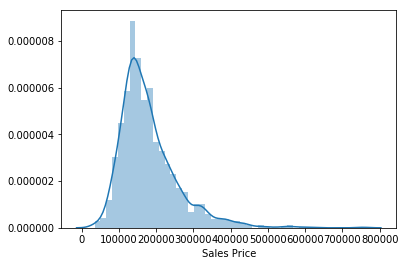

In [29]:
sale_price_td_pd = pd.Series(sale_price_td, name=data_labels[0])
ax = sns.distplot(sale_price_td_pd)

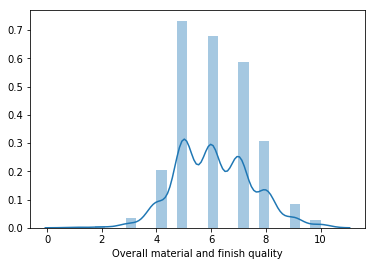

In [30]:
overall_quality_td_pd = pd.Series(overall_quality_td, name=data_labels[1])
sns.distplot(overall_quality_td_pd)


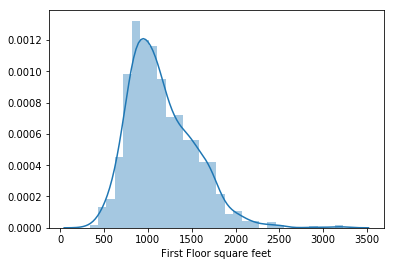

In [31]:
first_floor_square_feet_td_pd = pd.Series(first_floor_square_feet_td, name=data_labels[2])
sns.distplot(first_floor_square_feet_td_pd)

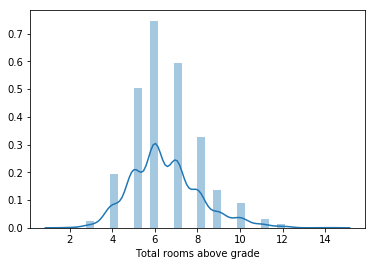

In [32]:
total_rooms_td_pd = pd.Series(total_rooms_td, name=data_labels[3])
sns.distplot(total_rooms_td_pd)

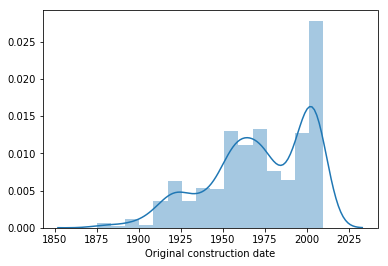

In [33]:
year_built_td_pd = pd.Series(year_built_td, name=data_labels[4])
sns.distplot(year_built_td_pd)

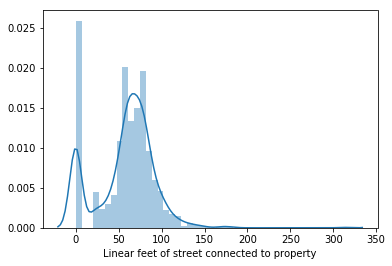

In [34]:
loat_front_td_pd = pd.Series(loat_front_td, name=data_labels[5])
sns.distplot(loat_front_td_pd)

***************************************************


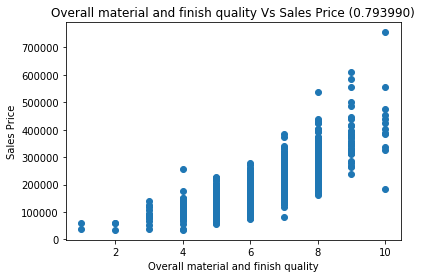

***************************************************


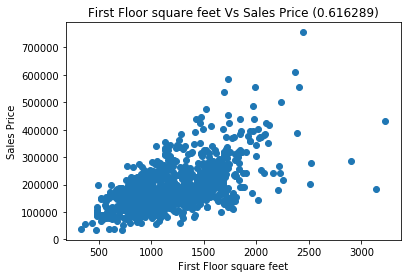

***************************************************


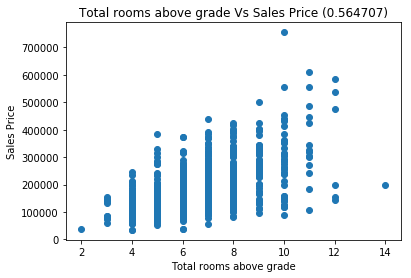

***************************************************


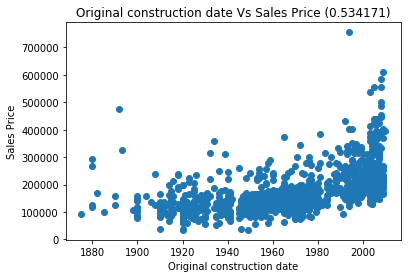

***************************************************


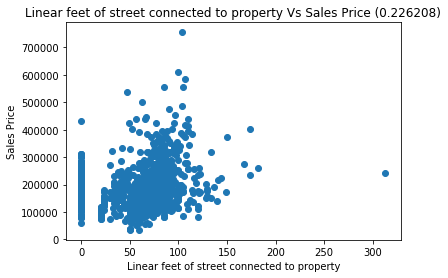

In [35]:

def add_scatter_plot(x, y,x_label, y_label):
    corr_coef = np.corrcoef(x, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    
    ax.scatter(x, y)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title('%s Vs %s (%f)' % (x_label, y_label, corr_coef[0,1]))

    plt.show()    
    
print_hr()
add_scatter_plot(overall_quality_td, sale_price_td, data_labels[1], data_labels[0])

print_hr()
add_scatter_plot(first_floor_square_feet_td, sale_price_td, data_labels[2], data_labels[0])

print_hr()
add_scatter_plot(total_rooms_td, sale_price_td, data_labels[3], data_labels[0])

print_hr()
add_scatter_plot(year_built_td, sale_price_td, data_labels[4], data_labels[0])

print_hr()
add_scatter_plot(loat_front_td, sale_price_td, data_labels[5], data_labels[0])


Las 2 variables con mas coeficiente son `Sales Price` y `Overall Material and Finish Quality`

In [36]:
def train_model(x_nd_array, y_nd_array, epochs, imprimir_error_cada, learning_rate):

    print(y_nd_array.shape)
    mat = np.column_stack((x_nd_array, np.ones_like(x_nd_array)))
    print(mat.shape)
    y_hat_arr = np.array([])
    error_arr = np.array([])
    
    for i in range(0, epochs):
        y_hat = np.matmul(y_nd_array, mat)
#        print('y_hat')
#        print(y_hat)
#        print('y')
#        print(y_nd_array)
        np.append(y_hat_arr, y_hat)
        error = (0.5)*np.mean(np.power((y_nd_array - y_hat[0]) , 2))
        if i % imprimir_error_cada == 0 :
            print('Error %f' % error)
            
        np.append(error_arr, error)
        gradiente_m = np.mean((y_hat[0] - y_nd_array)*x_nd_array)
        gradiente_b = np.mean(y_hat[0] - y_nd_array)
#        print(gradiente)
        mat = np.array([mat[0] - learning_rate*gradiente_m, mat[1] - learning_rate*gradiente_b])
#        print('mat')
#        print(mat.shape)
        
    
    return (y_hat_arr, error_arr)

train_data = train_model(overall_quality_td, sale_price_td, 15, 1,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 


ax.grid()
ax.set_xlim(0,train_data.shape[0])
ax.set_ylim(np.min(train_data[1]), np.max(train_data[1]))
ax.plot(list(range(0, train_data.shape[0])),train_data[1])

ax.set_xlabel('# de iteración')
ax.set_ylabel('Error')
ax.set_title('Grafica de # de iteracion vrs error')

plt.show()

(1168,)
(1168, 2)
Error 962359321691701888.000000


ValueError: shapes (1168,) and (2,2) not aligned: 1168 (dim 0) != 2 (dim 0)